# Introduction to Deep Learning in Python
### Course Description
Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. In this course, you'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.

## 1. Basics of deep learning and neural networks
In this chapter, you'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. You'll build simple neural networks and generate predictions with them.

In [35]:
import numpy as np
from numpy import array
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sn

from sklearn.metrics import mean_squared_error


# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping


### Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

![](Images/1_4.png)


Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

The weights feeding into the output node are available in weights['output'].

NumPy will be pre-imported for you as np in all exercises.

#### Instructions

- Calculate the value in node 0 by multiplying input_data by its weights weights['node_0'] and computing their sum. This is the 1st node in the hidden layer.
- Calculate the value in node 1 using input_data and weights['node_1']. This is the 2nd node in the hidden layer.
- Put the hidden layer values into an array. This has been done for you.
- Generate the prediction by multiplying hidden_layer_outputs by weights['output'] and computing their sum.


In [2]:
input_data=  np.array([3, 5])
weights= {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [3]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data  * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


### The Rectified Linear Activation Function
As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3
relu(-3) = 0

#### Instructions

- Fill in the definition of the relu() function:
    - Use the max() function to calculate the value for the output of relu().
- Apply the relu() function to node_0_input to calculate node_0_output.
- Apply the relu() function to node_1_input to calculate node_1_output.

In [4]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


### Applying the network to many observations/rows of data
You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

#### Instructions

- Define a function called predict_with_network() that accepts two arguments - input_data_row and weights - and returns a prediction from the network as the output.
- Calculate the input and output values for each node, storing them as: node_0_input, node_0_output, node_1_input, and node_1_output.
    - To calculate the input value of a node, multiply the relevant arrays together and compute their sum.
    - To calculate the output value of a node, apply the relu() function to the input value of the node.
- Calculate the model output by calculating input_to_final_layer and model_output in the same way you calculated the input and output values for the nodes.
- Use a for loop to iterate over input_data:
    - Use your predict_with_network() to generate predictions for each row of the input_data - input_data_row. Append each prediction to results.

In [5]:
input_data =  [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [6]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs*weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)

[52, 63, 0, 148]


### Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output'].

![s](Images/2.png)

#### Instructions

- Calculate node_0_0_input using its weights weights['node_0_0'] and the given input_data. Then apply the relu() function to get node_0_0_output.
- Do the same as above for node_0_1_input to get node_0_1_output.
- Calculate node_1_0_input using its weights weights['node_1_0'] and the outputs from the first hidden layer - hidden_0_outputs. Then apply the relu() function to get node_1_0_output.
- Do the same as above for node_1_1_input to get node_1_1_output.
- Calculate model_output using its weights weights['output'] and the outputs from the second hidden layer hidden_1_outputs array. Do not apply the relu() function to this output.

In [7]:
weights = {'node_0_0': array([2, 4]),
 'node_0_1': array([ 4, -5]),
 'node_1_0': array([-1,  2]),
 'node_1_1': array([1, 2]),
 'output': array([2, 7])}
input_data =  array([3, 5])

In [8]:
def predict_with_network1(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network1(input_data)
print(output)

182


## 2 Optimizing a neural network with backward propagation

Learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build on in the second half of the course.

### Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network:

![](Images/3.png)

Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

Use a pen and paper if necessary to experiment with different combinations. You'll use the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

#### Instructions

- Create a dictionary of weights called weights_1 where you have changed 1 weight from weights_0 (You only need to make 1 edit to weights_0 to generate the perfect prediction).
- Obtain predictions with the new weights using the predict_with_network() function with input_data and weights_1.
- Calculate the error for the new weights by subtracting target_actual from model_output_1.


In [9]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }
# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


### Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

#### Instructions

- Import mean_squared_error from sklearn.metrics.
- Using a for loop to iterate over each row of input_data:
- Make predictions for each row with weights_0 using the predict_with_network() function and append it to model_output_0.
- Do the same for weights_1, appending the predictions to model_output_1.
- Calculate the mean squared error of model_output_0 and then model_output_1 using the mean_squared_error() function. The first argument should be the actual values (target_actuals), and the second argument should be the predicted values (model_output_0 or model_output_1).


In [10]:
input_data = [array([0, 3]), array([1, 2]), array([-1, -2]), array([4, 0])]
target_actuals = [1, 3, 5, 7]
weights_0= {'node_0': array([2, 1]), 'node_1': array([1, 2]), 'output': array([1, 1])}
weights_1 = {'node_0': array([2, 1]),
 'node_1': array([1. , 1.5]),
 'output': array([1. , 1.5])}



In [11]:


# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


### Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (xb-y), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target you want to predict is stored in target.

#### Instructions

- Calculate the predictions, preds, by multiplying weights by the input_data and computing their sum.
- Calculate the error, which is preds minus target. Notice that this error corresponds to xb-y in the gradient expression.
- Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of input_data and error and multiply that by 2.

In [12]:
weights = array([0, 2, 1])
input_data =  array([1, 2, 3])
target = 0

In [13]:
# Calculate the predictions: preds
preds = (weights*input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)


[14 28 42]


### Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.

#### Instructions

- Set the learning rate to be 0.01 and calculate the error from the original predictions. This has been done for you.
- Calculate the updated weights by subtracting the product of learning_rate and slope from weights.
- Calculate the updated predictions by multiplying weights_updated with input_data and computing their sum.
- Calculate the error for the new predictions. Store the result as error_updated.


In [14]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated*input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


### Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

#### Instructions

- Using a for loop to iteratively update weights:
    - Calculate the slope using the get_slope() function.
    - Update the weights using a learning rate of 0.01.
    - Calculate the mean squared error (mse) with the updated weights using the get_mse() function.
    - Append mse to mse_hist.
- Hit 'Submit Answer' to visualize mse_hist. What trend do you notice?

In [15]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

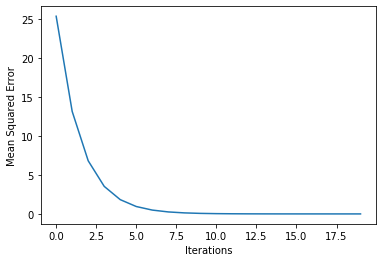

In [16]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


## 3 Building deep learning models with keras


In this chapter, you'll use the Keras library to build deep learning models for both regression and classification. You'll learn about the Specify-Compile-Fit workflow that you can use to make predictions, and by the end of the chapter, you'll have all the tools necessary to build deep neural networks.

In [17]:
df = pd.read_csv('hourly_wages.csv')


In [18]:
predictors  = df.drop('wage_per_hour', axis = 1).values
target =df.wage_per_hour.values


### Specifying a model
Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.

#### Instructions

- Store the number of columns in the predictors data to n_cols. This has been done for you.
- Start by creating a Sequential model called model.
- Use the .add() method on model to add a Dense layer.
- Add 50 units, specify activation='relu', and the input_shape parameter to be the tuple (n_cols,) which means it has n_cols items in each row of data, and any number of rows of data are acceptable as inputs.
- Add another Dense layer. This should have 32 units and a 'relu' activation.
- Finally, add an output layer, which is a Dense layer with a single node. Don't use any activation function here.

In [19]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))


In [20]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


### Fitting the model
You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

Instructions

- Fit the model. Remember that the first argument is the predictive features (predictors), and the data to be predicted (target) is the second argument.

In [21]:
# Fit the model
model.fit(predictors,target)

Epoch 1/1
534/534 [==============================] - 1s 949us/step - loss: 32.9494


### Last steps in classification models
You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!

#### Instructions

- Convert df.survived to a categorical variable using the to_categorical() function.
- Specify a Sequential model called model.
- Add a Dense layer with 32 nodes. Use 'relu' as the activation and (n_cols,) as the input_shape.
- Add the Dense output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the activation should be 'softmax'.
- Compile the model, using 'sgd' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy (what fraction of predictions were correct) at the end of each epoch.
- Fit the model using the predictors and the target.

In [22]:
df = pd.read_csv('titanic_all_numeric.csv')


In [23]:
predictors = df.drop('survived',axis = 1).values
target = to_categorical(df.survived)
n_cols = predictors.shape[1]

In [24]:
n_cols


10

In [25]:
# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu',input_shape= (n_cols,)))

# Add the output layer
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss = 'categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(predictors,target)

Epoch 1/1
891/891 [==============================] - 0s 297us/step - loss: 3.6917 - accuracy: 0.5634


## 4 Fine-tuning keras models

Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks.

### Changing optimization parameters
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

#### Instructions


- Import SGD from keras.optimizers.
- Create a list of learning rates to try optimizing with called lr_to_test. The learning rates in it should be .000001, 0.01, and 1.
- Using a for loop to iterate over lr_to_test:
- Use the get_new_model() function to build a new, unoptimized model.
- Create an optimizer called my_optimizer using the SGD() constructor with keyword argument lr=lr.
- Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use 'categorical_crossentropy' for the loss parameter.
- Fit your model using the predictors and target.

In [27]:
def get_new_model(input_shape = (n_cols,)):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [30]:
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 0s 271us/step - loss: 2.3902


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 161us/step - loss: 1.5251


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 158us/step - loss: 91419179.6009


### Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

#### Instructions

- Compile your model using 'adam' as the optimizer and 'categorical_crossentropy' for the loss. To see what fraction of predictions are correct (the accuracy) in each epoch, specify the additional keyword argument metrics=['accuracy'] in model.compile().
- Fit the model using the predictors and target. Create a validation split of 30% (or 0.3). This will be reported in each epoch.


In [34]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split = 0.3, epochs = 10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s 275us/step - loss: 1.0922 - accuracy: 0.6100 - val_loss: 0.5412 - val_accuracy: 0.7090
Epoch 2/10
623/623 [==============================] - 0s 83us/step - loss: 0.7165 - accuracy: 0.6340 - val_loss: 0.5818 - val_accuracy: 0.7313
Epoch 3/10
623/623 [==============================] - 0s 122us/step - loss: 0.6667 - accuracy: 0.6372 - val_loss: 0.5517 - val_accuracy: 0.7239
Epoch 4/10
623/623 [==============================] - 0s 107us/step - loss: 0.6415 - accuracy: 0.6597 - val_loss: 0.5339 - val_accuracy: 0.7425
Epoch 5/10
623/623 [==============================] - 0s 77us/step - loss: 0.6027 - accuracy: 0.6581 - val_loss: 0.5258 - val_accuracy: 0.7463
Epoch 6/10
623/623 [==============================] - 0s 94us/step - loss: 0.6236 - accuracy: 0.6677 - val_loss: 0.5487 - val_accuracy: 0.6940
Epoch 7/10
623/623 [==============================] - 0s 75us/step - loss: 0.6259 - accuracy:

### Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

#### Instructions

- Import EarlyStopping from keras.callbacks.
- Compile the model, once again using 'adam' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy at each epoch.
- Create an EarlyStopping object called early_stopping_monitor. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience parameter of EarlyStopping() to be 2.
- Fit the model using the predictors and target. Specify the number of epochs to be 30 and use a validation split of 0.3. In addition, pass [early_stopping_monitor] to the callbacks parameter.


In [36]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

# Fit the model
model.fit(predictors,target,epochs=30,validation_split=0.3,callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 352us/step - loss: 1.9784 - accuracy: 0.5618 - val_loss: 0.9605 - val_accuracy: 0.6194
Epoch 2/30
623/623 [==============================] - 0s 103us/step - loss: 0.8045 - accuracy: 0.6083 - val_loss: 0.6302 - val_accuracy: 0.6828
Epoch 3/30
623/623 [==============================] - 0s 115us/step - loss: 0.7199 - accuracy: 0.6308 - val_loss: 0.6136 - val_accuracy: 0.7052
Epoch 4/30
623/623 [==============================] - 0s 88us/step - loss: 0.6642 - accuracy: 0.6485 - val_loss: 0.5615 - val_accuracy: 0.7052
Epoch 5/30
623/623 [==============================] - 0s 101us/step - loss: 0.6209 - accuracy: 0.6758 - val_loss: 0.5982 - val_accuracy: 0.7425
Epoch 6/30
623/623 [==============================] - 0s 93us/step - loss: 0.6132 - accuracy: 0.6581 - val_loss: 0.6507 - val_accuracy: 0.7201


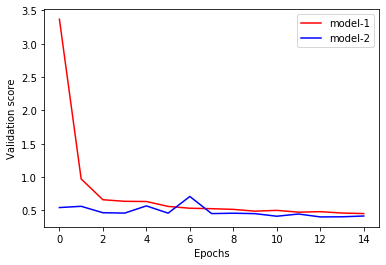

In [55]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

# Create the new model: model_1
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu', input_shape=input_shape))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'categorical_crossentropy')



# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu', input_shape=input_shape))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', label = 'model-1')
plt.plot(model_2_training.history['val_loss'], 'b', label = 'model-2')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


### Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

#### Instructions

- Specify a model called model_2 that is like model_1, but which has 3 hidden layers of 50 units instead of only 1 hidden layer.
    - Use input_shape to specify the input shape in the first hidden layer.
    - Use 'relu' activation for the 3 hidden layers and 'softmax' for the output layer, which should have 2 units.
- Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results! For both models, you should look for the best val_loss and val_acc, which won't be the last epoch for that model.

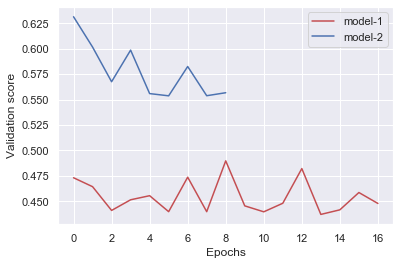

In [62]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50,activation='relu', input_shape = input_shape))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(50,activation='relu'))

# Add the output layer
model_2.add(Dense(2,activation='softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
sn.set()
plt.plot(model_1_training.history['val_loss'], 'r', label = 'model-1')
plt.plot(model_2_training.history['val_loss'], 'b', label = 'model-2')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

### Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a blog post by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out Advanced Deep Learning with Keras in Python to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at "Convolutional Neural Networks for Image Processing" to learn image-specific applications of Keras.

#### Instructions

- Create a Sequential object to start your model. Call this model.
- Add the first Dense hidden layer of 50 units to your model with 'relu' activation. For this data, the input_shape is (784,).
- Add a second Dense hidden layer with 50 units and a 'relu' activation function.
- Add the output layer. Your activation function should be 'softmax', and the number of nodes in this layer should be the same as the number of possible outputs in this case: 10.
- Compile model as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
- Fit the model using X and y using a validation_split of 0.3.

In [86]:
df = pd.read_csv('mnist.csv',header=None)
y = df[0].values
X = df.drop(0, axis = 1).values
y = to_categorical(y)

In [90]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu',input_shape =  (784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy',metrics=['accuracy'] )

# Fit the model
model.fit(X,y, validation_split = 0.3, epochs = 10)

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 0s 217us/step - loss: 22.6143 - accuracy: 0.4007 - val_loss: 7.7897 - val_accuracy: 0.5641
Epoch 2/10
1400/1400 [==============================] - 0s 127us/step - loss: 3.7569 - accuracy: 0.7157 - val_loss: 4.9621 - val_accuracy: 0.6572
Epoch 3/10
1400/1400 [==============================] - 0s 133us/step - loss: 1.8622 - accuracy: 0.7907 - val_loss: 4.5523 - val_accuracy: 0.7055
Epoch 4/10
1400/1400 [==============================] - 0s 142us/step - loss: 0.9247 - accuracy: 0.8786 - val_loss: 3.7316 - val_accuracy: 0.7188
Epoch 5/10
1400/1400 [==============================] - 0s 125us/step - loss: 0.4869 - accuracy: 0.9164 - val_loss: 3.7141 - val_accuracy: 0.7421
Epoch 6/10
1400/1400 [==============================] - 0s 143us/step - loss: 0.3899 - accuracy: 0.9343 - val_loss: 3.6709 - val_accuracy: 0.7488
Epoch 7/10
1400/1400 [==============================] - 0s 129us/step - loss